<a href="https://colab.research.google.com/github/skimaza/assist/blob/main/perceptron_iris_problems_ext.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI 전략경영MBA 경영자를 위한 딥러닝 원리의 이해
# Perceptron 실습 예제
# 붓꽃 분류 잘 안되는 경우에 대한 보충 예제

The original code comes from Sebastian Reschka's blog (http://sebastianraschka.com/Articles/2015_singlelayer_neurons.html).<br/>
Slightly modified for the lecture. -skimaza

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd

In [ ]:
import os
from urllib.request import urlopen

IRIS_DATA = "iris.dat"
if not os.path.exists(IRIS_DATA):
    raw = urlopen('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data').read()
    with open(IRIS_DATA, "wb") as f:
        f.write(raw)

In [ ]:
df = pd.read_csv(IRIS_DATA, header=None)

In [ ]:
# versicolor and virginica
y2 = df.iloc[50:150, 4].values
y2 = np.where(y2 == 'Iris-virginica', -1, 1)

# sepal width and petal width
X2 = df.iloc[50:150, [1,3]].values

In [ ]:


pos = X2[[y2 == 1]]
neg = X2[[y2 == -1]]

min_x = min(X2[:,0])
max_x = max(X2[:,0])
print(min_x, max_x)


2.0 3.8


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  after removing the cwd from sys.path.


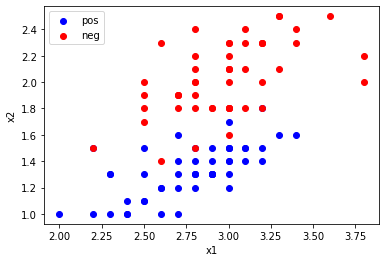

In [ ]:

fig = plt.figure()
ax = fig.add_subplot(111)


ax.scatter(pos[:,0], pos[:, 1], color='blue', label="pos")
ax.scatter(neg[:,0], neg[:, 1], color='red', label="neg")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(loc=2, scatterpoints=1, fontsize=10)

plt.show()

# 학습데이터 순서를 셔플링

In [ ]:
np.random.permutation(len(X2))

array([28, 62, 71, 77, 65, 17, 18, 51,  7, 89, 59, 92, 93, 34, 21, 30, 68,
       11, 63, 32, 16, 76, 31, 15, 45, 53, 20, 43, 78, 47,  4, 57, 13, 66,
       61, 87, 41, 24, 55, 22, 91, 80, 49, 69, 82, 25, 67,  9, 48, 12, 52,
       46, 99, 23,  1, 35, 44,  5, 84, 72, 42, 38, 50, 58, 19, 54, 70, 33,
       81, 98, 29, 10, 85, 74, 90, 94, 73, 14, 26, 88, 97, 60,  2, 86, 79,
       39, 40, 36, 83, 75, 95, 64,  3, 37,  6, 27, 96, 56,  8,  0])

In [ ]:
weights = []
errors_log = []
epochs = 50
eta = 0.01

def train_shuffled(X, y, epochs=epochs, eta=eta):
    global weights
    global errors_log
    weights = np.zeros(1 + X.shape[1])
    print("Initial weights", weights)
    errors_log = []

    for i in range(epochs):
        errors = 0
        print("EPOCHS", i+1)
        for ind in np.random.permutation(len(X)): # 셔플된 인덱스로 입력과 타겟 결정
            xi = X[ind]
            target = y[ind]
            update = eta * (target - predict(xi))
            #print(xi, "target", target, "sum", net_input(xi), "update", update)
            if update != 0:
                weights[1:] +=  update * xi
                weights[0] +=  update
                print("Updated WEIGHTS", weights)
                #errors += int(update != 0.0)
                errors += 1
        errors_log.append(errors)
    return

def net_input(X):
    global weights
    return np.dot(X, weights[1:]) + weights[0]

def predict(X):
    return np.where(net_input(X) >= 0.0, 1, -1)

In [ ]:
train_shuffled(X2, y2, epochs=25, eta=0.01)

Initial weights [0. 0. 0.]
EPOCHS 1
Updated WEIGHTS [-0.02  -0.064 -0.046]
Updated WEIGHTS [ 0.     0.    -0.016]
Updated WEIGHTS [0.02  0.056 0.014]
Updated WEIGHTS [ 0.    -0.002 -0.022]
Updated WEIGHTS [ 2.00000000e-02  4.60000000e-02 -3.46944695e-18]
Updated WEIGHTS [ 0.    -0.004 -0.038]
Updated WEIGHTS [ 0.02   0.052 -0.012]
Updated WEIGHTS [ 0.    -0.024 -0.056]
Updated WEIGHTS [ 0.02   0.036 -0.026]
Updated WEIGHTS [ 0.    -0.024 -0.062]
Updated WEIGHTS [ 0.02   0.038 -0.032]
Updated WEIGHTS [ 0.    -0.034 -0.082]
Updated WEIGHTS [ 0.02   0.026 -0.052]
Updated WEIGHTS [ 0.    -0.03  -0.082]
Updated WEIGHTS [ 0.02   0.038 -0.05 ]
Updated WEIGHTS [ 0.    -0.024 -0.098]
Updated WEIGHTS [ 0.02   0.032 -0.074]
Updated WEIGHTS [ 0.04   0.078 -0.048]
Updated WEIGHTS [ 0.02   0.024 -0.086]
Updated WEIGHTS [ 0.04   0.078 -0.066]
Updated WEIGHTS [ 0.02   0.016 -0.102]
Updated WEIGHTS [ 0.04   0.076 -0.068]
Updated WEIGHTS [ 0.02   0.012 -0.114]
Updated WEIGHTS [ 0.04   0.062 -0.092]
Upda

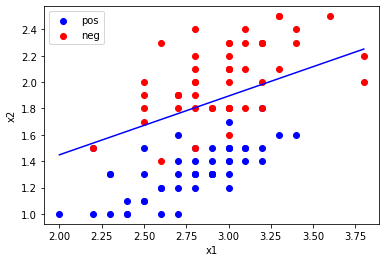

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

point_x = np.array([min_x, max_x])
point_y = np.array([- (weights[0]+weights[1]*min_x)/weights[2], - (weights[0]+weights[1]*max_x)/weights[2]])

line, = ax.plot(point_x, point_y, 'b-', picker=5)

ax.scatter(pos[:,0], pos[:, 1], color='blue', label="pos")
ax.scatter(neg[:,0], neg[:, 1], color='red', label="neg")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(loc=2, scatterpoints=1, fontsize=10)

plt.show()

# errors_log가 10 이상에서 정체됨

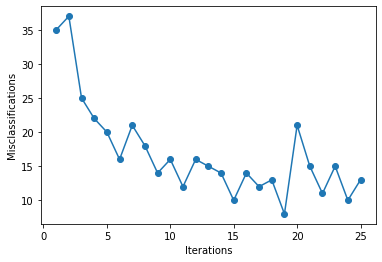

In [ ]:
plt.plot(range(1, len(errors_log)+1), errors_log, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Misclassifications')
plt.show()

# 셔플링하지 않고 업데이트마다 경계선을 플로팅하여 어떻게 바뀌는지 확인

In [ ]:
weights = []
errors_log = []
epochs = 50
eta = 0.01

def train_plot_on_update(X, y, epochs=epochs, eta=eta):
    global weights
    global errors_log
    weights = np.zeros(1 + X.shape[1])
    print("Initial weights", weights)
    errors_log = []

    for i in range(epochs):
        errors = 0
        print("EPOCHS", i+1)
        for xi, target in zip(X, y):
            update = eta * (target - predict(xi))
            # print(xi, "target", target, "sum", net_input(xi), "update", update)
            if update != 0:
                weights[1:] +=  update * xi
                weights[0] +=  update
                print("Updated WEIGHTS", weights)
                #errors += int(update != 0.0)
                errors += 1
                plot_on_update(pos, neg, weights, min_x, max_x)
        errors_log.append(errors)
    return

def net_input(X):
    global weights
    return np.dot(X, weights[1:]) + weights[0]

def predict(X):
    return np.where(net_input(X) >= 0.0, 1, -1)

def plot_on_update(pos, neg, weights, min_x, max_x):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    point_x = np.array([min_x, max_x])
    point_y = np.array([- (weights[0]+weights[1]*min_x)/weights[2], - (weights[0]+weights[1]*max_x)/weights[2]])

    line, = ax.plot(point_x, point_y, 'b-', picker=5)

    ax.scatter(pos[:,0], pos[:, 1], color='blue', label="pos")
    ax.scatter(neg[:,0], neg[:, 1], color='red', label="neg")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.legend(loc=2, scatterpoints=1, fontsize=10)

    plt.show()
    plt.close(fig)

Initial weights [0. 0. 0.]
EPOCHS 1
Updated WEIGHTS [-0.02  -0.066 -0.05 ]


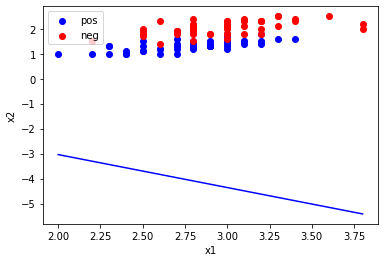

EPOCHS 2
Updated WEIGHTS [ 0.    -0.002 -0.022]


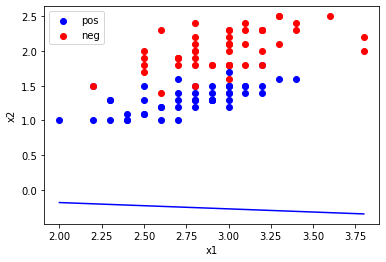

Updated WEIGHTS [0.02  0.062 0.008]


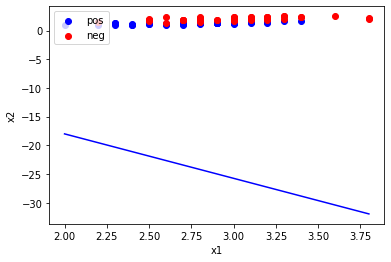

Updated WEIGHTS [ 0.    -0.004 -0.042]


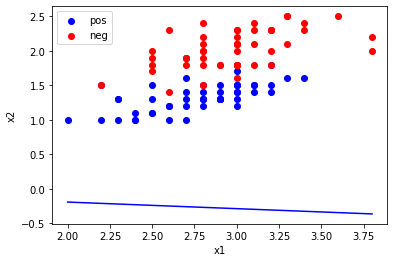

EPOCHS 3
Updated WEIGHTS [ 0.02   0.06  -0.014]


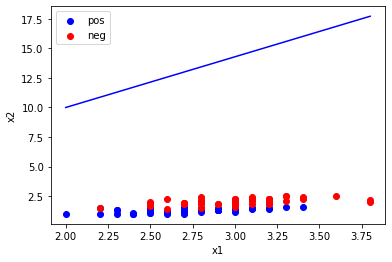

Updated WEIGHTS [ 0.    -0.006 -0.064]


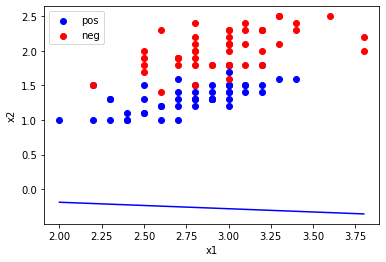

EPOCHS 4
Updated WEIGHTS [ 0.02   0.058 -0.036]


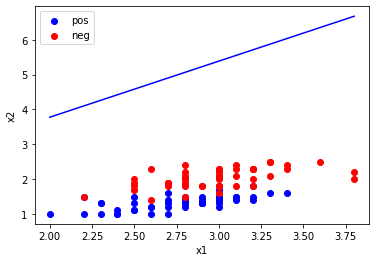

Updated WEIGHTS [ 0.    -0.008 -0.086]


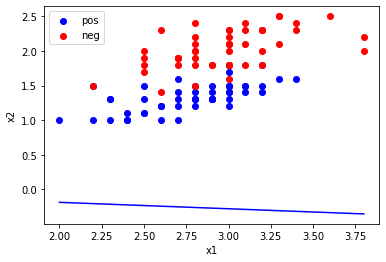

EPOCHS 5
Updated WEIGHTS [ 0.02   0.056 -0.058]


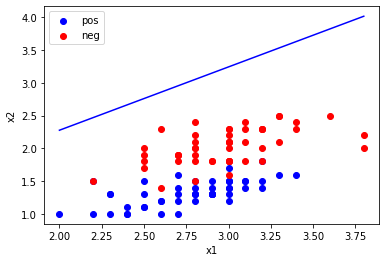

Updated WEIGHTS [ 0.    -0.01  -0.108]


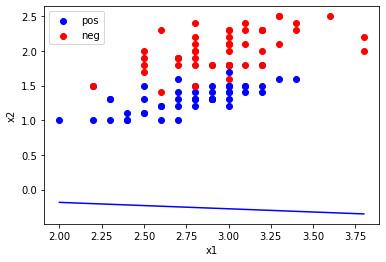

EPOCHS 6
Updated WEIGHTS [ 0.02   0.054 -0.08 ]


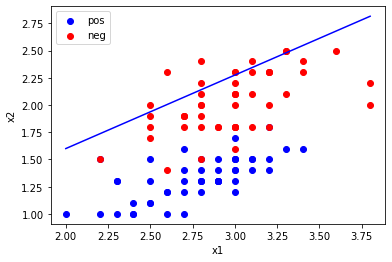

Updated WEIGHTS [ 0.00000000e+00 -1.38777878e-17 -1.18000000e-01]


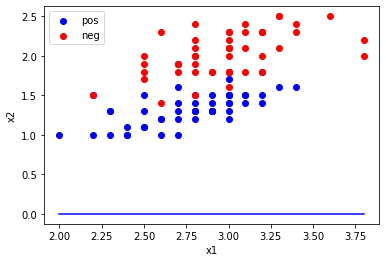

EPOCHS 7
Updated WEIGHTS [ 0.02   0.064 -0.09 ]


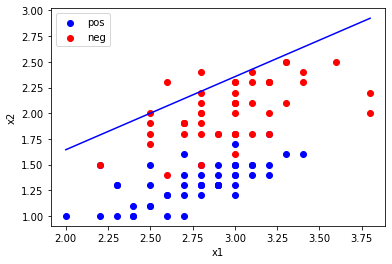

Updated WEIGHTS [ 0.    -0.002 -0.14 ]


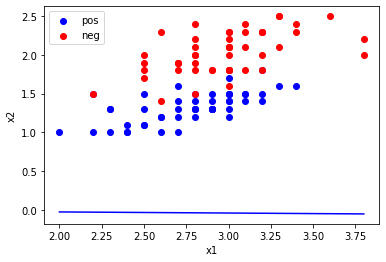

EPOCHS 8
Updated WEIGHTS [ 0.02   0.062 -0.112]


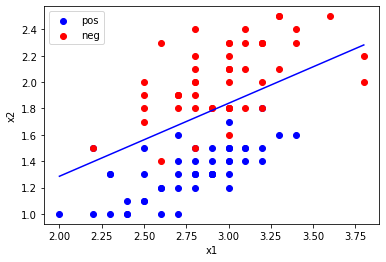

Updated WEIGHTS [ 0.04   0.106 -0.082]


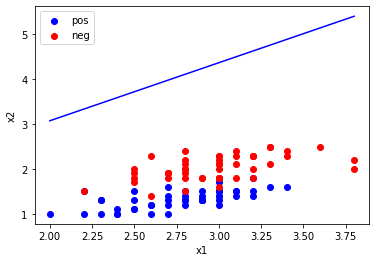

Updated WEIGHTS [ 0.02   0.04  -0.132]


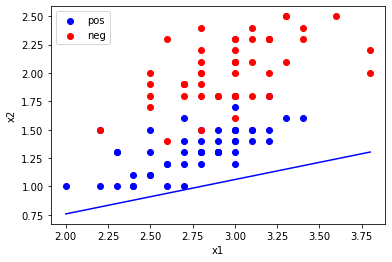

EPOCHS 9
Updated WEIGHTS [ 0.04   0.104 -0.104]


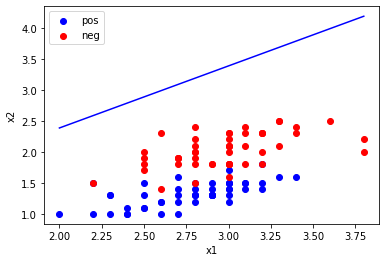

Updated WEIGHTS [ 0.02   0.038 -0.154]


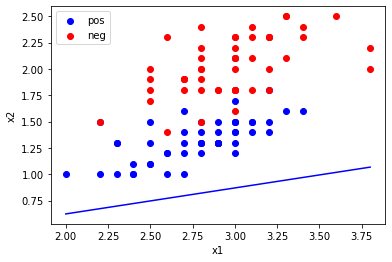

EPOCHS 10
Updated WEIGHTS [ 0.04   0.102 -0.126]


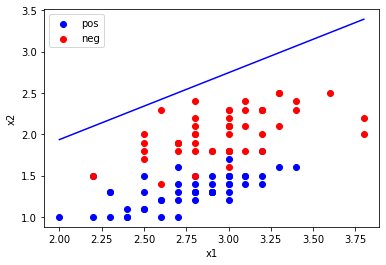

Updated WEIGHTS [ 0.02   0.036 -0.176]


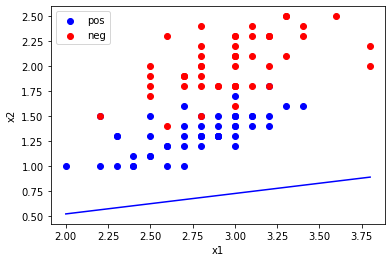

In [ ]:
train_plot_on_update(X2, y2, epochs=10, eta=0.01)

In [ ]:
weights = []
errors_log = []
epochs = 50
eta = 0.01

def train(X, y, epochs=epochs, eta=eta):
    global weights
    global errors_log
    weights = np.zeros(1 + X.shape[1])
    print("Initial weights", weights)
    errors_log = []

    for i in range(epochs):
        errors = 0
        print("EPOCHS", i+1)
        for xi, target in zip(X, y):
            update = eta * (target - predict(xi))
            #print(xi, "target", target, "sum", net_input(xi), "update", update)
            if update != 0:
                weights[1:] +=  update * xi
                weights[0] +=  update
                print("Updated WEIGHTS", weights)
                #errors += int(update != 0.0)
                errors += 1
        errors_log.append(errors)
    return

def net_input(X):
    global weights
    return np.dot(X, weights[1:]) + weights[0]

def predict(X):
    return np.where(net_input(X) >= 0.0, 1, -1)

In [ ]:
train(X2, y2, eta=0.01)

Initial weights [0. 0. 0.]
EPOCHS 1
Updated WEIGHTS [-0.02  -0.066 -0.05 ]
EPOCHS 2
Updated WEIGHTS [ 0.    -0.002 -0.022]
Updated WEIGHTS [0.02  0.062 0.008]
Updated WEIGHTS [ 0.    -0.004 -0.042]
EPOCHS 3
Updated WEIGHTS [ 0.02   0.06  -0.014]
Updated WEIGHTS [ 0.    -0.006 -0.064]
EPOCHS 4
Updated WEIGHTS [ 0.02   0.058 -0.036]
Updated WEIGHTS [ 0.    -0.008 -0.086]
EPOCHS 5
Updated WEIGHTS [ 0.02   0.056 -0.058]
Updated WEIGHTS [ 0.    -0.01  -0.108]
EPOCHS 6
Updated WEIGHTS [ 0.02   0.054 -0.08 ]
Updated WEIGHTS [ 0.00000000e+00 -1.38777878e-17 -1.18000000e-01]
EPOCHS 7
Updated WEIGHTS [ 0.02   0.064 -0.09 ]
Updated WEIGHTS [ 0.    -0.002 -0.14 ]
EPOCHS 8
Updated WEIGHTS [ 0.02   0.062 -0.112]
Updated WEIGHTS [ 0.04   0.106 -0.082]
Updated WEIGHTS [ 0.02   0.04  -0.132]
EPOCHS 9
Updated WEIGHTS [ 0.04   0.104 -0.104]
Updated WEIGHTS [ 0.02   0.038 -0.154]
EPOCHS 10
Updated WEIGHTS [ 0.04   0.102 -0.126]
Updated WEIGHTS [ 0.02   0.036 -0.176]
EPOCHS 11
Updated WEIGHTS [ 0.04   0.1 

In [ ]:
2.7*(-0.066) + 1.9*(-0.05)-0.02

-0.2932

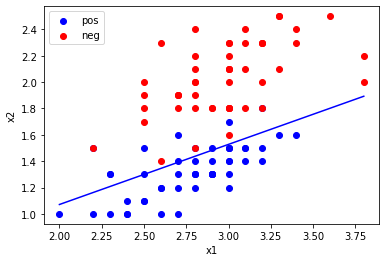

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

point_x = np.array([min_x, max_x])
point_y = np.array([- (weights[0]+weights[1]*min_x)/weights[2], - (weights[0]+weights[1]*max_x)/weights[2]])

line, = ax.plot(point_x, point_y, 'b-', picker=5)

ax.scatter(pos[:,0], pos[:, 1], color='blue', label="pos")
ax.scatter(neg[:,0], neg[:, 1], color='red', label="neg")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(loc=2, scatterpoints=1, fontsize=10)

plt.show()

In [ ]:
errors_log

[1,
 3,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 4,
 4,
 3,
 4,
 4,
 3,
 4,
 4,
 3]

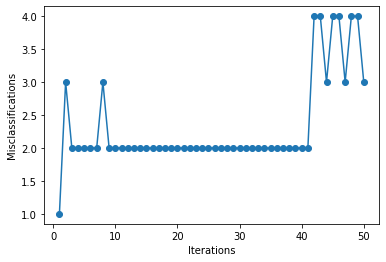

In [ ]:
plt.plot(range(1, len(errors_log)+1), errors_log, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Misclassifications')
plt.show()

In [ ]:
print(errors_log)

[1, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 3, 4, 4, 3, 4, 4, 3]


In [ ]:
print('Total number of misclassifications: %d of 100' % (y2 != predict(X2)).sum())

Total number of misclassifications: 11 of 100
